In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append('../')

import nets.maskrcnn.maskr as m
import nets.maskrcnn.angledataset as a
import nets.maskrcnn.vgg19bridge as v

Using TensorFlow backend.


In [3]:
train, val, test = a.AngleDataset.createSets()

In [4]:
maskrcnn = m.MaskR()

GPU available: True
Storing in  ../nets/maskrcnn/weights/perception3






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead






Setup complete after 11.727240800857544 seconds


In [6]:
vgg19 = v.VGG19Bridge()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Setup complete after 3.773204803466797


In [7]:
maskrcnn.train(train, val, epochs=1)


Starting at epoch 0. LR=0.001

Checkpoint Path: ../nets/maskrcnn/weights/perception/stimuli20200216T2047/mask_rcnn_stimuli_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)

/home/haehn/miniconda3/envs/MASKRCNN/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/haehn/miniconda3/envs/MASKRCNN/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/haehn/miniconda3/envs/MASKRCNN/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/haehn/miniconda3/envs/MASKRCNN/lib/pytho



Epoch 1/1
100/100 [==============================] - 49s 491ms/step - loss: 1.2860 - rpn_class_loss: 0.0565 - rpn_bbox_loss: 0.6345 - mrcnn_class_loss: 0.0881 - mrcnn_bbox_loss: 0.2932 - mrcnn_mask_loss: 0.2137 - val_loss: 0.9936 - val_rpn_class_loss: 0.0150 - val_rpn_bbox_loss: 0.4940 - val_mrcnn_class_loss: 0.0528 - val_mrcnn_bbox_loss: 0.2024 - val_mrcnn_mask_loss: 0.2294

Training complete after 127.91805410385132 seconds


In [8]:
train, val, test = a.AngleDataset.createSets()

In [9]:
# use a single test image now (we could do a loop here for many test images)
ANY_INDEX = 10

x_test = test.load_image(ANY_INDEX)
y_test = test.image_info[ANY_INDEX]['angles']

In [10]:
maskrcnn_results = maskrcnn.predict([x_test], verbose=False)



Instructions for updating:
Use `tf.cast` instead.
Re-starting from epoch 1


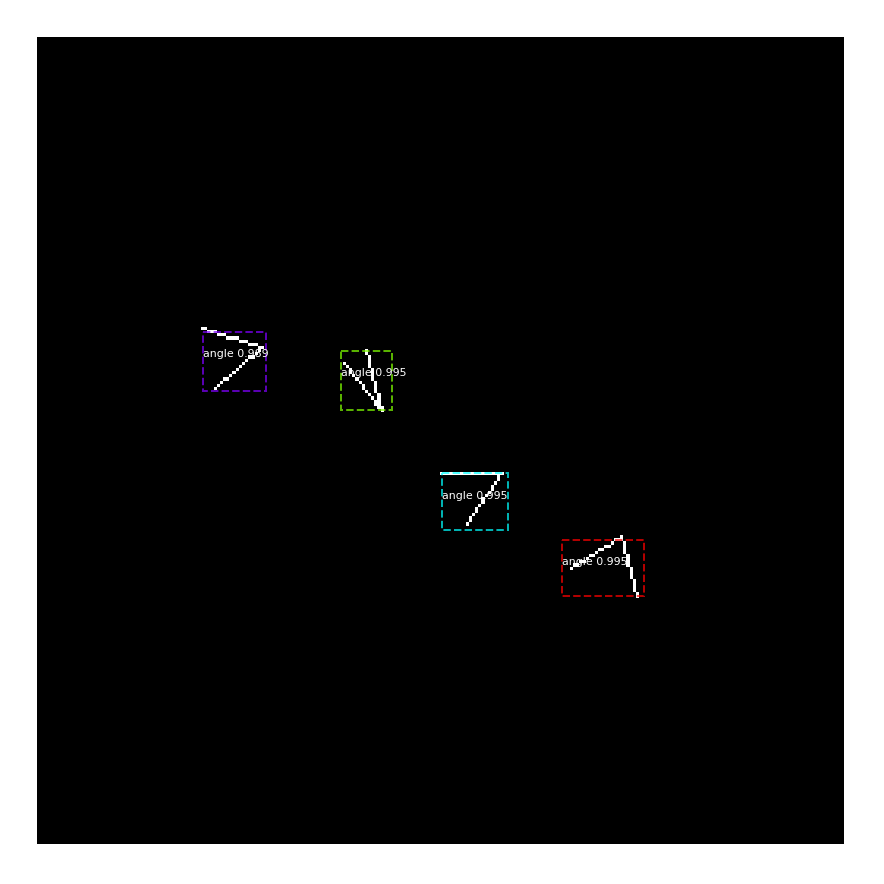

In [13]:
from mrcnn import visualize

r = maskrcnn_results[0] # we only have one result since we only used one image to test
visualize.display_instances(x_test, r['rois'], r['masks'], r['class_ids'], 
                            test.class_names, r['scores'])

In [20]:
# now we use VGG19 for the individual angles
y_pred = vgg19.predict([x_test], [maskrcnn_results])

Prediction complete after 0.03242373466491699


In [21]:
y_test

[59, 22, 53, 75]

In [23]:
y_pred

[[56.10190451145172, 25.175130665302277, 53.71339201927185, 70.76663017272949]]

In [26]:
#
# let's compare the ground truth (y_test) with the prediction (y_pred)
#
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred[0])

9.227690117522965

In [27]:
# this means roughly sqrt(9.22)==3, this pipeline misreads +-3 degrees of each angle